In [1]:
from traits.api import Delegate, HasTraits, Instance, Int, Str

In [2]:
class Parent ( HasTraits ):

    # INITIALIZATION: last_name' is initialized to '':
    last_name = Str( '' )


class Child ( HasTraits ):

    age = Int

    # VALIDATION: 'father' must be a Parent instance:
    father = Instance( Parent )

    # DELEGATION: 'last_name' is delegated to father's 'last_name':
    last_name = Delegate( 'father' )

    # NOTIFICATION: This method is called when 'age' changes:
    def _age_changed ( self, old, new ):
        print 'Age changed from %s to %s ' % ( old, new )

In [3]:
# Set up the example:
joe = Parent()
joe.last_name = 'Johnson'
moe = Child()
moe.father = joe

In [4]:
# DELEGATION in action:
print "Moe's last name is %s " % moe.last_name

Moe's last name is Johnson 


In [5]:
# NOTIFICATION in action
moe.age = 10

Age changed from 0 to 10 


In [6]:
# VISUALIZATION: Displays a UI for editing moe's attributes
# (if a supported GUI toolkit is installed)
moe.configure_traits()

Age changed from 10 to 2 


True

In [1]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np


#directory = 'D://Users//D.Rudolf-Lvovsky//Denis//Juelich-2017//Data//PEEM_space_charge//'
#im = Image.open(directory + '003_BiTe_EUV_2-4kV_1500Hz_001.tif')
#
directory = 'D://Users//D.Rudolf-Lvovsky//Denis//Juelich-2017//Simulations//BornAgain//Daniel//'
im = Image.open(directory + 'test.png')


#draw = ImageDraw.Draw(im)
#draw.line((0, 0) + im.size, fill=128)
#draw.line((0, im.size[1], im.size[0], 0), fill=128)
#del draw

width = im.size[0]
height = im.size[1]
print width
print height

image = np.array(im.getdata())[:,0].reshape(height,width)
plt.imshow(image)
#plt.pcolormesh(image)
plt.colorbar()
plt.show()

IOError: [Errno 2] No such file or directory: 'D://Users//D.Rudolf-Lvovsky//Denis//Juelich-2017//Simulations//BornAgain//Daniel//test.png'

In [58]:
# create the data points for the line
#x1,x2 = 290,410 
#y1,y2 =290,300
x1,x2 = 1,400 
y1,y2 =1,500
t = np.arange(0,1,1e-3)
x = x1+(x2-x1)*t
y = y1+(y2-y1)*t
#grid_x, grid_y = np.meshgrid(x,y)
#grid_x, grid_y = grid_x.T, grid_y.T

In [59]:
# data points at which to interpolate
xx = [[i] for i in x]
yy = [[i] for i in y]
x_i = np.concatenate((yy,xx), axis = 1)
x_i

array([[   1.   ,    1.   ],
       [   1.499,    1.399],
       [   1.998,    1.798],
       ..., 
       [ 498.503,  398.803],
       [ 499.002,  399.202],
       [ 499.501,  399.601]])

In [60]:
# calculate the distance vector
def get_dist_vec(points):
    x = []
    for i in range(0,len(points)):
        diff = points[i]-points[0]
        dist = np.sqrt(diff[0]**2 + diff[1]**2)
        x.append(dist)
    return x

In [61]:
# make points of the image
list_y, list_x =range(1,height+1,1), range(1,width+1,1) 
points = np.array([[i,j] for i in list_y for j in list_x])
points.shape

(255024L, 2L)

In [62]:
# values at points
values = image.flatten()

In [63]:
import time
from scipy.interpolate import griddata
start = time.time()
image_interpolated = griddata(points, values, x_i, method='nearest')
end = time.time()
'The interpolation took {} s.'.format(end-start)

'The interpolation took 0.373000144958 s.'

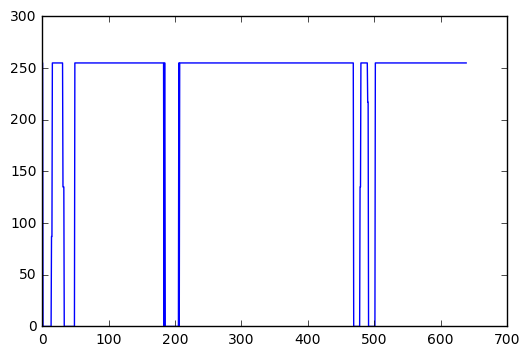

In [64]:
x_vec = get_dist_vec(x_i)
plt.plot(x_vec,image_interpolated)
plt.show()

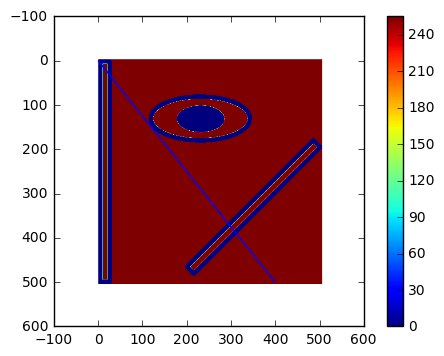

In [69]:
plt.imshow(image)
plt.colorbar()
plt.plot(x,y)
plt.show()

In [66]:
import time
from scipy.interpolate import RectBivariateSpline
start = time.time()
image_interpolated = RectBivariateSpline(list_y,list_x,image)
end = time.time()
'The interpolation took {} s.'.format(end-start)

'The interpolation took 0.048999786377 s.'

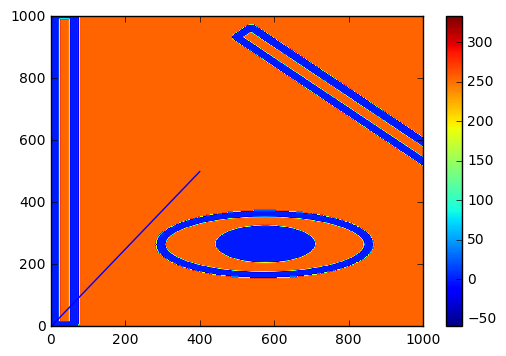

In [67]:
plt.pcolormesh(image_interpolated(yy,xx))
plt.colorbar()
plt.plot(x,y)
plt.show()

Generate test edge

In [6]:
import numpy as np
import matplotlib.pyplot as plt

ones = np.ones(100)
slope = np.arange(0,1,0.01)
y = np.concatenate((0*ones,slope,ones))
x = np.arange(0,np.shape(y)[0],1)

In [7]:
y_err = np.random.normal(0,0.05,np.shape(y)[0])+y

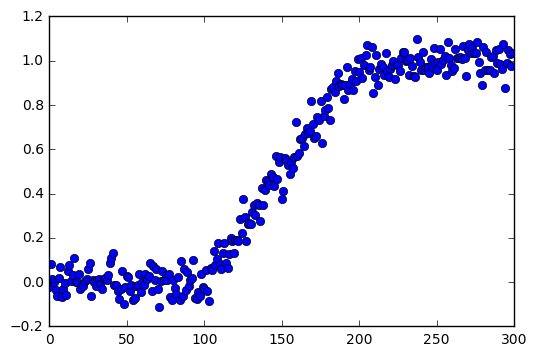

In [8]:
plt.plot(x,y_err, 'ob')
plt.show()

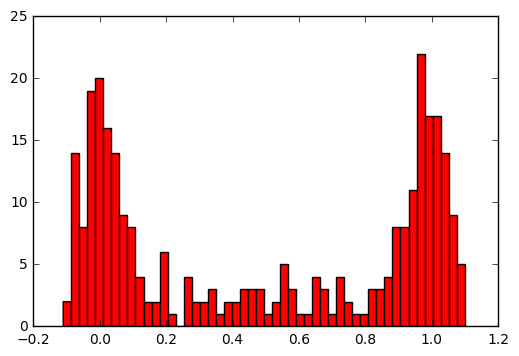

[  2.  14.   8.  19.  20.  16.  14.   9.   8.   4.   2.   2.   6.   1.   0.
   4.   2.   2.   3.   1.   2.   2.   3.   3.   3.   1.   2.   5.   3.   1.
   1.   4.   3.   1.   4.   2.   1.   1.   3.   3.   4.   8.   8.  11.  22.
  17.  17.  14.   9.   5.]
[-0.10997542 -0.08579846 -0.06162151 -0.03744456 -0.01326761  0.01090935
  0.0350863   0.05926325  0.08344021  0.10761716  0.13179411  0.15597106
  0.18014802  0.20432497  0.22850192  0.25267888  0.27685583  0.30103278
  0.32520973  0.34938669  0.37356364  0.39774059  0.42191754  0.4460945
  0.47027145  0.4944484   0.51862536  0.54280231  0.56697926  0.59115621
  0.61533317  0.63951012  0.66368707  0.68786403  0.71204098  0.73621793
  0.76039488  0.78457184  0.80874879  0.83292574  0.8571027   0.88127965
  0.9054566   0.92963355  0.95381051  0.97798746  1.00216441  1.02634137
  1.05051832  1.07469527  1.09887222]
(51L,)
(50L,)


In [9]:
hist = plt.hist(y_err, bins=50, color= 'red')
plt.show()
x_hist = hist[0]
y_hist = hist[1]
print x_hist
print y_hist
print np.shape(y_hist)
print np.shape(x_hist)

In [10]:
hist = np.histogram(y_err, bins = 50)
hist

(array([ 2, 14,  8, 19, 20, 16, 14,  9,  8,  4,  2,  2,  6,  1,  0,  4,  2,
         2,  3,  1,  2,  2,  3,  3,  3,  1,  2,  5,  3,  1,  1,  4,  3,  1,
         4,  2,  1,  1,  3,  3,  4,  8,  8, 11, 22, 17, 17, 14,  9,  5], dtype=int64),
 array([-0.10997542, -0.08579846, -0.06162151, -0.03744456, -0.01326761,
         0.01090935,  0.0350863 ,  0.05926325,  0.08344021,  0.10761716,
         0.13179411,  0.15597106,  0.18014802,  0.20432497,  0.22850192,
         0.25267888,  0.27685583,  0.30103278,  0.32520973,  0.34938669,
         0.37356364,  0.39774059,  0.42191754,  0.4460945 ,  0.47027145,
         0.4944484 ,  0.51862536,  0.54280231,  0.56697926,  0.59115621,
         0.61533317,  0.63951012,  0.66368707,  0.68786403,  0.71204098,
         0.73621793,  0.76039488,  0.78457184,  0.80874879,  0.83292574,
         0.8571027 ,  0.88127965,  0.9054566 ,  0.92963355,  0.95381051,
         0.97798746,  1.00216441,  1.02634137,  1.05051832,  1.07469527,
         1.09887222]))

Make points for KMeans

In [11]:
x = []
freq = hist[0]
borders = hist[1]
for i in range(len(borders)-1):
    x_value = (borders[i+1]+borders[i])/2.0
    x.append(x_value)    

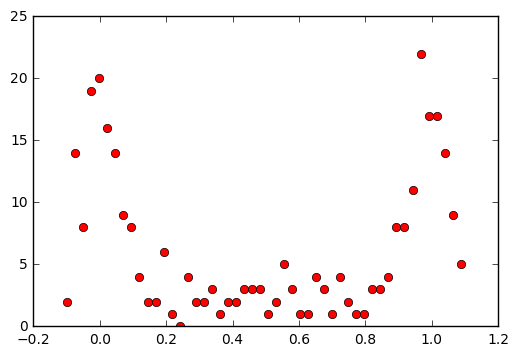

In [12]:
plt.plot(x,freq, 'or')
plt.show()

In [13]:
points = zip(x, freq)

In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2).fit(points)
print kmeans.labels_
print kmeans.cluster_centers_

[0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 0 0]
[[  0.49505283   3.4       ]
 [  0.49203071  16.4       ]]


In [19]:
from sklearn.cluster import KMeans

data = y_err.reshape(-1,1)
kmeans = KMeans(n_clusters = 2).fit(data)
print kmeans.labels_
print kmeans.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
[[ 0.08175188]
 [ 0.91136108]]


Fitting

In [40]:
from scipy.optimize import curve_fit
from scipy.special import erf
import numpy as np

def func(x,a,sigma, x_0):
    return a*erf((x-x_0)/sigma*1/np.sqrt(2))

In [45]:
x = np.arange(-10,10,0.1)
y = func(x,10,2.5,2)+np.random.normal(0,0.5, x.shape[0])

In [51]:
param = curve_fit(func,x,y)[0]
curve_fit(func,x,y)[1]

array([[  2.96323509e-03,   1.46793160e-03,  -8.88077788e-07],
       [  1.46793160e-03,   1.88944092e-03,  -4.28085258e-07],
       [ -8.88077788e-07,  -4.28085258e-07,   5.81089775e-04]])

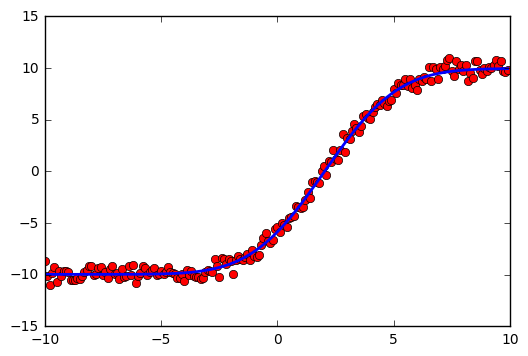

In [47]:
plt.plot(x,y, 'or')
plt.plot(x,func(x,param[0], param[1], param[2]), '-b', linewidth = 2)
plt.show()

Test code 

In [54]:
print '/*.TI/*'

/*.TI/*


In [3]:
a = [1,2]
bool(a)

True